In [109]:
## Implementing neural network from scratch
# This would be a neural network for binary classification
# There would be the input layer, hidden layer and then the output layer (one neuron)

import numpy as np
import matplotlib.pyplot as plt

class Neural_Network():
  def __init__(self, n_input, n_hidden, learning_rate, epochs):
    self.lr = learning_rate
    self.epochs = epochs
    self.losses = []

    # Initialize the weights and bias for the hidden layer and the output layer
    self.w1 = np.random.rand(n_hidden, n_input) * 0.01 # Shape : hidden_neurons, input_neurons
    self.b1 = np.zeros((1, n_hidden)) * 0.01 # Shape : (1, hidden_neurons) one for each neuron
    self.w2 = np.random.rand(n_hidden, 1) * 0.01 # Shape : 1, hidden (for binary classification, only one output neuron is required)
    self.b2 = np.zeros((1, 1)) * 0.01 # basically just a scalar

  def sigmoid(self, z):
      return 1/ (1 + np.exp(-z)) # sigmoid activation function

  def sigmoid_derivative(self, z):
    return z * (1 - z) # derivartive of activation function for the backward pass

  def fit(self, X, y): # Training Loop
    m = X.shape[0] # getting the number of features of X
    y = y.reshape(-1,1) # Reshape into a column vector

    for i in range(self.epochs):
      # Forward Pass
      output1 = np.dot(X, self.w1.T) + self.b1
      activation_output1 = self.sigmoid(output1)
      output2 = np.dot(activation_output1, self.w2) + self.b2
      activation_output2 = self.sigmoid(output2) # prediction

      # Calculate the loss (binary cross entropy loss)
      # 1e-15 to prevent log zero
      self.losses.append(-np.mean(y * np.log(activation_output2 + 1e-15) + (1 - y) * np.log(1 - activation_output2 + 1e-15)))

      # Backward propagation
      # output layer gradients
      error = activation_output2 - y
      dw2 = (1/m) * np.dot(activation_output1.T, error)
      db2 = (1/m) * np.sum(error, axis=0, keepdims=True)

      # hidden layer gradients
      delta = (np.dot(error, self.w2.T)) * self.sigmoid_derivative(activation_output1)
      dw1 = (1/m) * np.dot(X.T, delta)
      db1 = (1/m) * np.sum(delta, axis=0, keepdims=True)

      # Update the weights and biases
      self.w1 -= self.lr*dw1.T
      self.b1 -= self.lr*db1
      self.w2 -= self.lr*dw2
      self.b2 -= self.lr*db2

      if i % 100 == 0:
        print(f"Epoch {i}, Loss: {self.losses[i]:.4f}")

  def predict_proba(self, X):
    # Forward pass
    output1 = np.dot(X, self.w1.T) + self.b1
    activation_output1 = self.sigmoid(output1)
    output2 = np.dot(activation_output1, self.w2) + self.b2
    activation_output2 = self.sigmoid(output2)
    return activation_output2.T

  def predict(self, X):
    # Using the output from the forward pass for prediction
    output = self.predict_proba(X)
    return (output >= 0.5).astype(int) # threshold at 0.5



Epoch 0, Loss: 0.6931
Epoch 100, Loss: 0.6930
Epoch 200, Loss: 0.6920
Epoch 300, Loss: 0.6849
Epoch 400, Loss: 0.6456
Epoch 500, Loss: 0.5516
Epoch 600, Loss: 0.4616
Epoch 700, Loss: 0.4079
Epoch 800, Loss: 0.3793
Epoch 900, Loss: 0.3640
Epoch 1000, Loss: 0.3555
Epoch 1100, Loss: 0.3505
Epoch 1200, Loss: 0.3475
Epoch 1300, Loss: 0.3456
Epoch 1400, Loss: 0.3444
Epoch 1500, Loss: 0.3435
Epoch 1600, Loss: 0.3429
Epoch 1700, Loss: 0.3425
Epoch 1800, Loss: 0.3421
Epoch 1900, Loss: 0.3418
Epoch 2000, Loss: 0.3416
Epoch 2100, Loss: 0.3414
Epoch 2200, Loss: 0.3412
Epoch 2300, Loss: 0.3411
Epoch 2400, Loss: 0.3409
Epoch 2500, Loss: 0.3408
Epoch 2600, Loss: 0.3407
Epoch 2700, Loss: 0.3406
Epoch 2800, Loss: 0.3405
Epoch 2900, Loss: 0.3404
Epoch 3000, Loss: 0.3403
Epoch 3100, Loss: 0.3403
Epoch 3200, Loss: 0.3402
Epoch 3300, Loss: 0.3401
Epoch 3400, Loss: 0.3401
Epoch 3500, Loss: 0.3400
Epoch 3600, Loss: 0.3400
Epoch 3700, Loss: 0.3399
Epoch 3800, Loss: 0.3399
Epoch 3900, Loss: 0.3398
Epoch 4000, 

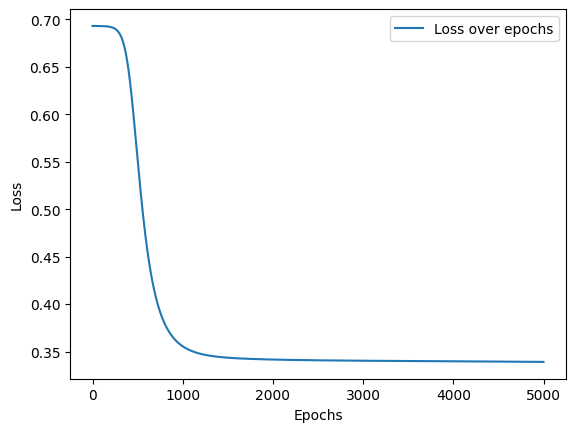

In [127]:
## Generate a dummy dataset

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

X, y = make_classification(
    n_samples=1000, n_features=2, n_informative=2, n_redundant=0,
    n_clusters_per_class=2, random_state=42
)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state = 42
)

model = Neural_Network(2, 3, learning_rate=0.1, epochs=5000)
model.fit(X_train, y_train)
accuracy = np.mean(model.predict(X_test) == y_test)
print(f"Final Accuracy: {accuracy:.2f}")

# Plot loss over epochs
plt.plot(model.losses, label="Loss over epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()



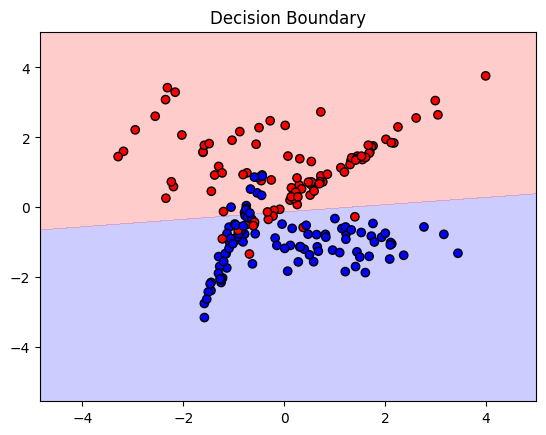

In [128]:
import numpy as np

# Create a grid of points
xx, yy = np.meshgrid(
    np.linspace(X[:,0].min()-1, X[:,0].max()+1, 200),
    np.linspace(X[:,1].min()-1, X[:,1].max()+1, 200)
)

grid = np.c_[xx.ravel(), yy.ravel()]
probs = model.predict_proba(grid).reshape(xx.shape)

# Plot decision boundary
plt.contourf(xx, yy, probs, levels=[0, 0.5, 1], alpha=0.2, colors=["blue", "red"])
plt.scatter(X_test[:,0], X_test[:,1], c=y_test, cmap="bwr", edgecolor="k")
plt.title("Decision Boundary")
plt.show()
